In [60]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [61]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Lenovo\Downloads\heart.csv")

In [62]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [64]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [65]:
df.shape

(918, 12)

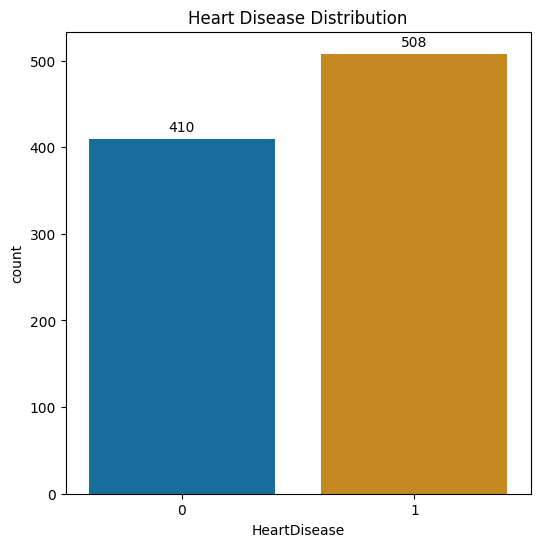

In [66]:

plt.figure(figsize=(6,6))
ax = sns.countplot(df, x='HeartDisease', hue='HeartDisease', palette='colorblind', legend=False)
plt.title("Heart Disease Distribution")

for p in ax.patches:
    height = int(p.get_height())
    x_pos = p.get_x() + p.get_width() / 2
    ax.text(x_pos, height + 5,
            str(height),
            ha='center',
            va='bottom',
            fontsize=10)

plt.show()

# PreProcessing

In [67]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [68]:
df.duplicated().sum()

np.int64(0)

In [69]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [70]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [71]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [72]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [73]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# EDA

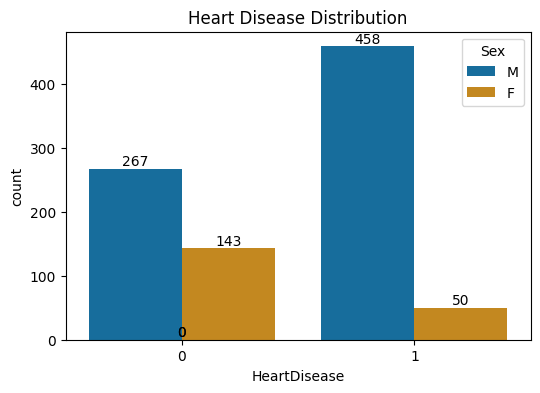

In [75]:
plt.figure(figsize=(6,4))
ax = sns.countplot(df, x='HeartDisease', hue='Sex', palette='colorblind', legend=True)
plt.title("Heart Disease Distribution")

# Give exact value for each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5, # posisi teks
            f'{int(height)}',                          # isi teks
            ha='center')                               # horizontal align center
            

plt.show()

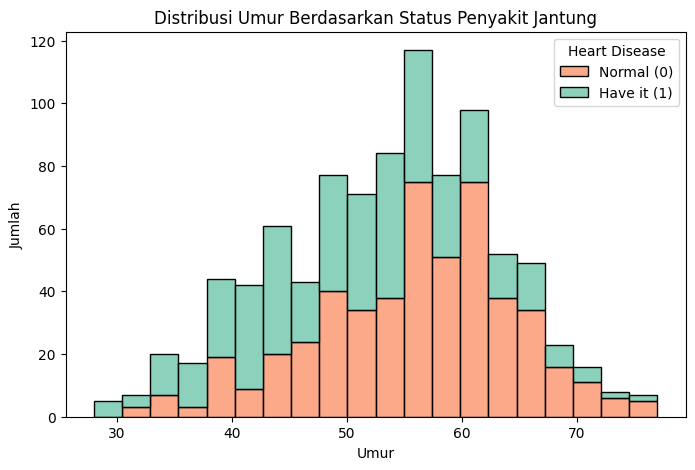

In [76]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='HeartDisease', multiple='stack', palette='Set2', bins=20)
plt.title("Distribusi Umur Berdasarkan Status Penyakit Jantung")
plt.xlabel("Umur")
plt.ylabel("Jumlah")
plt.legend(title='Heart Disease', labels=['Normal (0)', 'Have it (1)'])
plt.show()

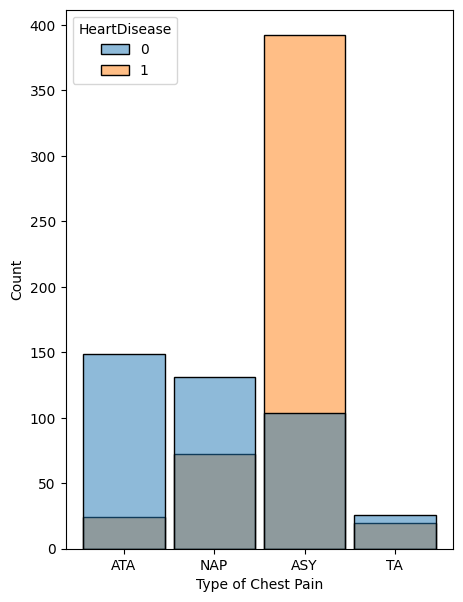

In [77]:
plt.figure(figsize=(5,7))
sns.histplot(data=df, x='ChestPainType', hue='HeartDisease', shrink=.9)
plt.xlabel("Type of Chest Pain")
# plt.ylabel("Freq")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

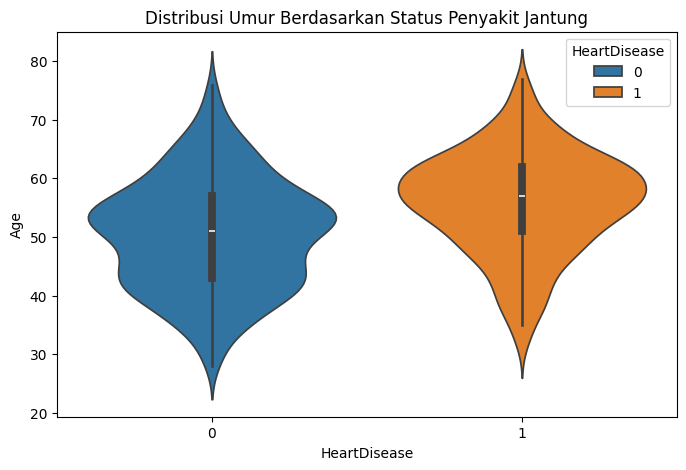

In [78]:
# for i in df['Sex']:

plt.figure(figsize=(8,5))
sns.violinplot(data=df, x="HeartDisease", y="Age", hue="HeartDisease")
plt.title("Distribusi Umur Berdasarkan Status Penyakit Jantung")
plt.show

# PreProcessing 2

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [80]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[['ChestPainType']])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['ChestPainType']))
encoded_df.index = df.index
df1 = pd.concat([df.drop(columns=['ChestPainType']), encoded_df], axis=1)

In [81]:
df1['Sex'] = df['Sex'].map({'M':1, 'F':0})
df1['ExerciseAngina'] = df['ExerciseAngina'].map({'Y':1, 'N':0})
df1['ST_Slope'] = df['ST_Slope'].map({'Down':0, 'Flat':1, 'Up':2})
df1['RestingECG'] = df['RestingECG'].map({'Normal':0, 'ST':1, 'LVH':2})
df1.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,0,172,0,0.0,2,0,0.0,1.0,0.0,0.0
1,49,0,160,180,0,0,156,0,1.0,1,1,0.0,0.0,1.0,0.0
2,37,1,130,283,0,1,98,0,0.0,2,0,0.0,1.0,0.0,0.0
3,48,0,138,214,0,0,108,1,1.5,1,1,1.0,0.0,0.0,0.0
4,54,1,150,195,0,0,122,0,0.0,2,0,0.0,0.0,1.0,0.0


In [82]:
df1.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,1.361656,0.553377,0.540305,0.188453,0.221133,0.050109
std,9.432617,0.407701,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414,0.498645,0.391287,0.415236,0.218289
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int64  
 5   RestingECG         918 non-null    int64  
 6   MaxHR              918 non-null    int64  
 7   ExerciseAngina     918 non-null    int64  
 8   Oldpeak            918 non-null    float64
 9   ST_Slope           918 non-null    int64  
 10  HeartDisease       918 non-null    int64  
 11  ChestPainType_ASY  918 non-null    float64
 12  ChestPainType_ATA  918 non-null    float64
 13  ChestPainType_NAP  918 non-null    float64
 14  ChestPainType_TA   918 non-null    float64
dtypes: float64(5), int64(10)
memory usage: 107.7 KB


In [84]:
# Split Dataset
from sklearn.model_selection import train_test_split

X = df1.drop('HeartDisease', axis=1) # Feature
y = df1['HeartDisease']              # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

print(y_train.value_counts())
print(y_test.value_counts())

HeartDisease
1    406
0    328
Name: count, dtype: int64
HeartDisease
1    102
0     82
Name: count, dtype: int64


In [85]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

num_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()

scaler.fit(X_train[num_features])

X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

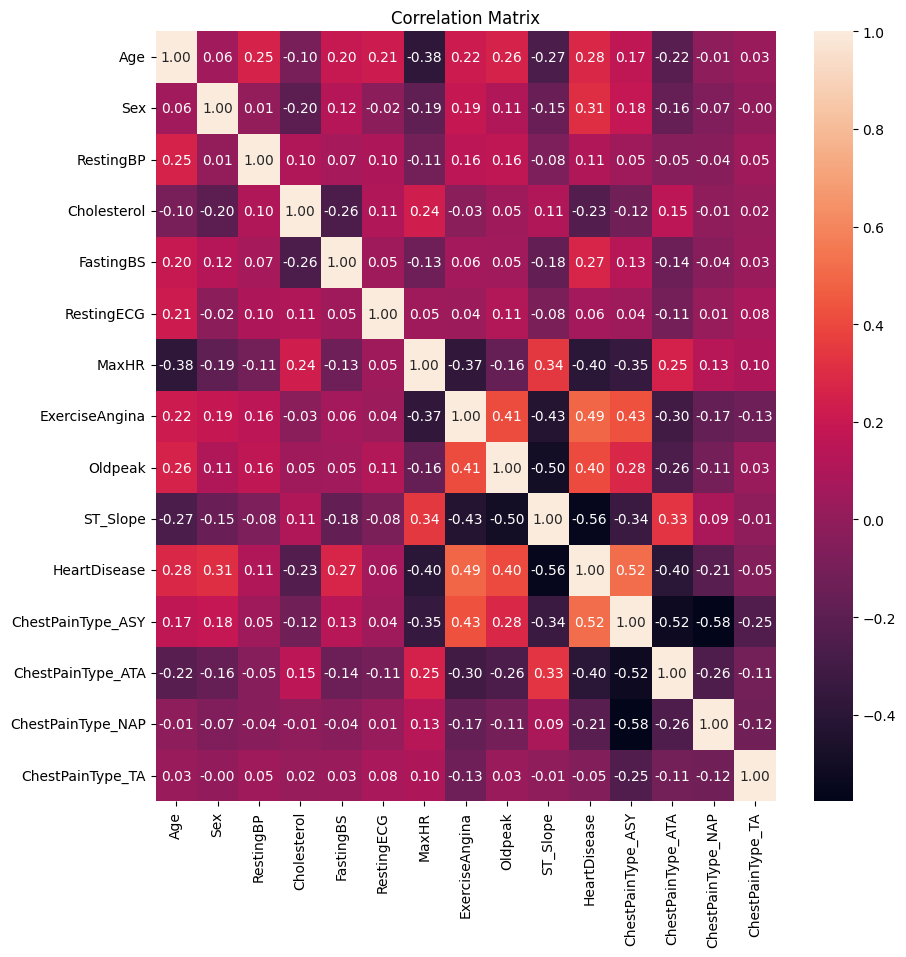

In [86]:
corr_matrix = df1.corr()

plt.figure(figsize=(10,10))
sns.heatmap(data=corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [87]:
from sklearn import svm

# Inisialisasi model SVM
svm_model = svm.SVC(kernel='rbf', C=1, gamma='scale', random_state=42, probability=True)

# Model Training
svm_model.fit(X_train, y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [88]:
y_pred = svm_model.predict(X_test)

In [89]:
result = X_test.copy()
result['Actual'] = y_test
result['Predicted'] = y_pred

result.head(10)

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Actual,Predicted
356,-0.831954,1,-0.989299,-1.876035,0,0,-0.905584,1,0.601071,1,1.0,0.0,0.0,0.0,1,1
763,0.440022,1,-0.048409,0.191755,0,2,1.418673,0,2.210549,2,0.0,0.0,1.0,0.0,1,1
817,0.652018,1,-0.435834,0.505616,0,2,0.179069,1,1.831848,1,1.0,0.0,0.0,0.0,1,1
735,-0.513960,1,-0.712567,-0.140568,0,0,0.101594,0,1.074447,1,0.0,0.0,1.0,0.0,1,1
892,-1.573940,0,0.283669,0.154830,0,0,0.605183,0,-0.819056,1,0.0,0.0,1.0,0.0,0,0
795,-1.255946,1,-0.712567,0.339454,1,0,2.232163,0,-0.061655,0,0.0,0.0,1.0,0.0,0,1
234,0.016030,0,0.394362,0.976408,0,1,0.140332,0,-0.819056,2,0.0,1.0,0.0,0.0,0,0
383,-1.679938,0,-1.266031,-1.876035,0,0,0.760134,0,-0.819056,1,1.0,0.0,0.0,0.0,1,1
642,-0.301964,0,-0.712567,0.847171,0,2,0.798871,0,-0.251005,2,0.0,0.0,1.0,0.0,0,0
454,0.440022,1,0.172976,-0.002100,1,0,-0.518208,1,0.317046,1,1.0,0.0,0.0,0.0,1,1


In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        82
           1       0.86      0.94      0.90       102

    accuracy                           0.88       184
   macro avg       0.89      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184



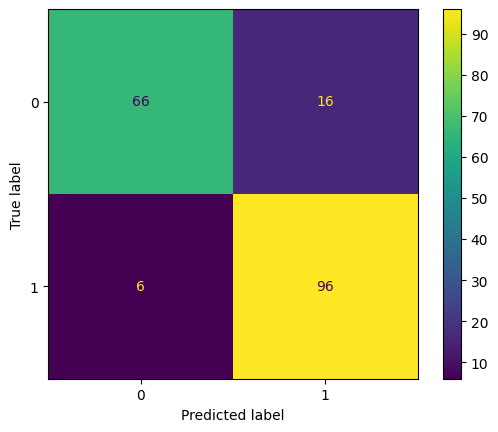

In [91]:
cm = confusion_matrix(y_test, y_pred, labels=svm_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm_model.classes_)
disp.plot()
plt.show()

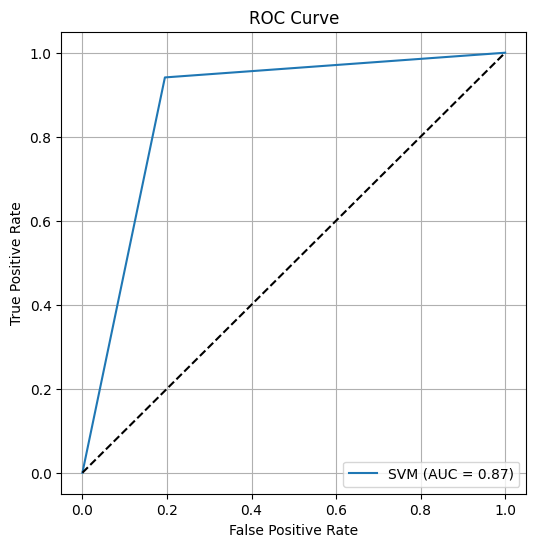

ROC AUC Score: 0.8730272596843616


In [92]:
fpr, tpr, tresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='SVM (AUC = %.02f)' % roc_auc)
plt.plot([0,1] , [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.grid()
plt.show()

print("ROC AUC Score:", roc_auc)

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#              'kernel': ['rbf']}

# param_grid = [
#   {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#   {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
#  ]

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4] 
}

# grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid = GridSearchCV(SVC(), param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'degree': [2, 3, ...], 'gamma': ['scale', 'auto', ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [101]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
SVC(C=1, degree=2, gamma='auto')


In [104]:
grid_predictions = grid.predict(X_test)

print(classification_report(y_test, grid_predictions))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        82
           1       0.86      0.93      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        82
           1       0.86      0.94      0.90       102

    accuracy                           0.88       184
   macro avg       0.89      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184

